In [150]:
from bokeh.plotting import figure, output_file, show
import numpy as np
import pandas as pd
import xlrd
data = xlrd.open_workbook('/Users/fulinguo/Desktop/family.xlsx')

In [151]:
table = data.sheets()[0]
nrows = table.nrows
columns=table.row_values(0)
income=[]
for i in range(1,nrows):
    income.append(table.row_values(i))
income=np.array(income)
income=pd.DataFrame(income,columns=columns)

In [152]:
income=income.replace('',0)
income=income.astype('float')
income.head()

,RELEASE NUMBER,FAMILY NUMBER,i1,s1,h1,w1,RELEASE NUMBER,1969 INT NUMBER,i2,s2,...,h39,w39,i39,RELEASE NUMBER,2017 FAMILY INTERVIEW (ID) NUMBER,s40,CURRENT STATE,h40,w40,i40
0,3.0,1.0,13108.0,24.0,52.0,46.0,3.0,1597.0,6307.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1964.0,9200.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,2604.0,24.0,56.0,57.0,3.0,592.0,2400.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
headage_ind=[i for i in columns if 'h' in i]
wifeage_ind=[i for i in columns if 'w' in i]
inc_ind=[i for i in columns if 'i' in i]
state_ind=[i for i in columns if 's' in i]
hanum=[]
wanum=[]
incnum=[]
stanum=[]
for i in headage_ind:
    hanum.append(columns.index(i))
for i in wifeage_ind:
    wanum.append(columns.index(i))
for i in inc_ind:
    incnum.append(columns.index(i))
for i in state_ind:
    stanum.append(columns.index(i))

In [154]:
inc_quan=[]
for ind in inc_ind:
    upp=income[(income[ind]!=0)][ind].quantile(0.75)
    med=income[(income[ind]!=0)][ind].quantile(0.5)
    low=income[(income[ind]!=0)][ind].quantile(0.25)
    inc_quan.append([upp,med,low])
inc_quan=np.array(inc_quan)
inc_quan

array([[ 9168.  ,  5692.  ,  3020.  ],
       [10100.  ,  6328.  ,  3453.  ],
       [11030.  ,  6900.  ,  3800.  ],
       [11800.  ,  7255.  ,  4000.  ],
       [12502.  ,  7756.5 ,  4204.  ],
       [13300.  ,  8230.  ,  4512.  ],
       [14439.  ,  9005.  ,  4859.  ],
       [15600.  ,  9576.  ,  5360.  ],
       [16600.  , 10200.  ,  5601.25],
       [18497.5 , 11200.  ,  5965.  ],
       [20300.  , 12200.  ,  6500.  ],
       [22500.  , 13624.  ,  7029.  ],
       [25025.  , 15154.  ,  7936.  ],
       [26979.25, 16145.  ,  8500.  ],
       [29074.25, 17500.  ,  9000.  ],
       [30300.  , 18000.  ,  9100.  ],
       [32793.5 , 19170.5 ,  9337.  ],
       [35500.  , 20920.  , 10240.75],
       [37000.  , 22046.  , 10752.  ],
       [38800.  , 23000.  , 11233.  ],
       [41000.  , 24000.  , 11829.  ],
       [43795.  , 25900.5 , 12666.  ],
       [43000.  , 24790.  , 11914.5 ],
       [44210.  , 25776.  , 12200.  ],
       [45400.  , 26090.  , 12323.  ],
       [48624.  , 27270. 

In [155]:
income.values

array([[3.0000e+00, 1.0000e+00, 1.3108e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [156]:
med_mar1=[[0]*16]*59
med_mar1=np.array(med_mar1)
for i in range(len(income)):
    for j in range(len(headage_ind)-2):
        type=16
        if j<=21:
            age=(income.values[i][wanum[j]]+income.values[i][hanum[j]])/2
            inc=income.values[i][incnum[j]]
            age2=(income.values[i][wanum[j+1]]+income.values[i][hanum[j+1]])/2 # set the period interval be 1 year
            inc2=income.values[i][incnum[j+1]]
            #elif j>=23:
            #age=income.values[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=78) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=0
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=1
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=2
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=3
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=4
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=5
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=6
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=7
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2<inc_quan[j+1][2]):
                type=8
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=9
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=10
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][0]):
                type=11
            elif (inc>=inc_quan[j][0]) & (inc2<inc_quan[j+1][2]):
                type=12
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=13
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=14
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][0]):
                type=15
            med_mar1[int(age)-20][type]+=1

In [157]:
med_mar1=med_mar1.reshape(59,4,4)
print('Number matrices:\n',med_mar1)
markov1=[]
for i in range(len(med_mar1)):
    for j in range(4):
        sum_quan=sum(med_mar1[i][j])
        med_mar1[i][j]/max(sum_quan,0.1)
        markov1.append(med_mar1[i][j]/max(sum_quan,0.1))
markov1=np.array(markov1)
markov1=markov1.reshape(59,4,4)

Number matrices:
 [[[1071  256   20    3]
  [ 244  846  227   13]
  [  26  191  447  102]
  [   3   16   70  174]]

 [[ 846  339   54    8]
  [ 208  925  322   28]
  [  15  228  631  157]
  [   2   27   95  210]]

 [[ 876  304   38    8]
  [ 239 1058  323   35]
  [  16  235  736  199]
  [   2   23  126  336]]

 [[1047  328   33    8]
  [ 263 1112  382   30]
  [  25  255  930  225]
  [   4   20  185  408]]

 [[1123  328   28    5]
  [ 293 1098  422   39]
  [  30  311 1015  242]
  [   2   29  175  507]]

 [[1078  282   25    3]
  [ 265 1194  452   40]
  [  24  325 1177  257]
  [   3   27  223  656]]

 [[1266  266   18    2]
  [ 289 1204  418   30]
  [  44  303 1186  315]
  [  12   24  192  759]]

 [[1385  278   44    4]
  [ 279 1182  403   26]
  [  46  365 1186  271]
  [   7   35  245  810]]

 [[1230  259   30    4]
  [ 263 1339  379   24]
  [  37  352 1387  299]
  [   8   32  270  992]]

 [[1430  285   44    6]
  [ 321 1382  396   39]
  [  59  385 1384  298]
  [   6   56  262 1002]]

 [

In [158]:
print(markov1)

[[[7.93333333e-01 1.89629630e-01 1.48148148e-02 2.22222222e-03]
  [1.83458647e-01 6.36090226e-01 1.70676692e-01 9.77443609e-03]
  [3.39425587e-02 2.49347258e-01 5.83550914e-01 1.33159269e-01]
  [1.14068441e-02 6.08365019e-02 2.66159696e-01 6.61596958e-01]]

 [[6.78428228e-01 2.71852446e-01 4.33039294e-02 6.41539695e-03]
  [1.40256237e-01 6.23735671e-01 2.17127444e-01 1.88806473e-02]
  [1.45489816e-02 2.21144520e-01 6.12027158e-01 1.52279340e-01]
  [5.98802395e-03 8.08383234e-02 2.84431138e-01 6.28742515e-01]]

 [[7.14518760e-01 2.47960848e-01 3.09951060e-02 6.52528548e-03]
  [1.44410876e-01 6.39274924e-01 1.95166163e-01 2.11480363e-02]
  [1.34907251e-02 1.98145025e-01 6.20573356e-01 1.67790894e-01]
  [4.10677618e-03 4.72279261e-02 2.58726899e-01 6.89938398e-01]]

 [[7.39406780e-01 2.31638418e-01 2.33050847e-02 5.64971751e-03]
  [1.47174035e-01 6.22271964e-01 2.13766088e-01 1.67879127e-02]
  [1.74216028e-02 1.77700348e-01 6.48083624e-01 1.56794425e-01]
  [6.48298217e-03 3.24149109e-02 2

<IPython.core.display.Javascript object>


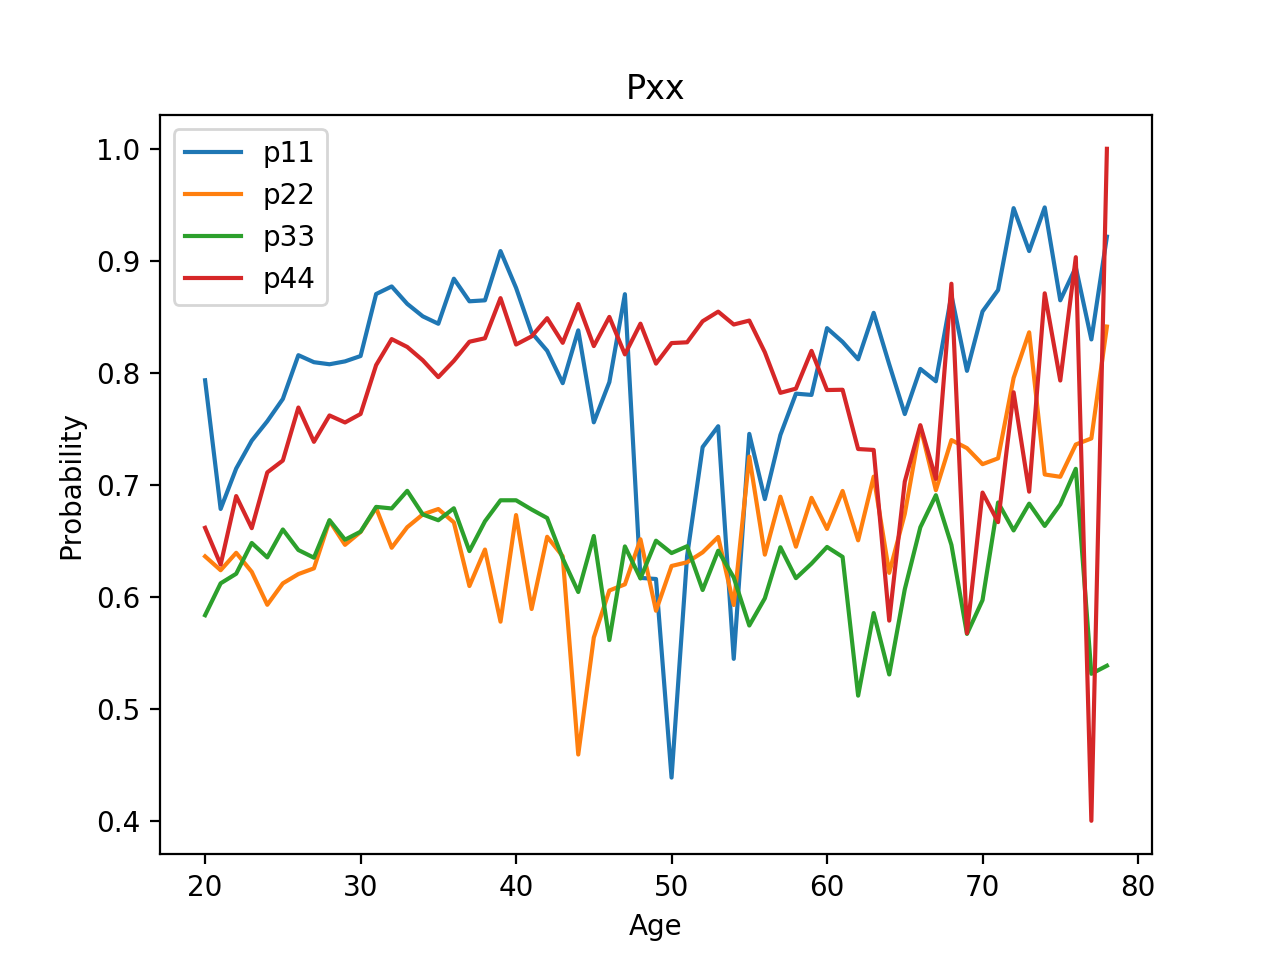

In [159]:
import matplotlib.pyplot as plt
q11=[]
q22=[]
q33=[]
q44=[]
for i in markov1:
    q11.append(i[0][0])
    q22.append(i[1][1])
    q33.append(i[2][2])
    q44.append(i[3][3])
age=np.arange(20,20+len(q11))
markov1.shape
%matplotlib notebook
plt.plot(age,q11,label='p11')
plt.plot(age,q22,label='p22')
plt.plot(age,q33,label='p33')
plt.plot(age,q44,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Pxx')
plt.legend()

<IPython.core.display.Javascript object>


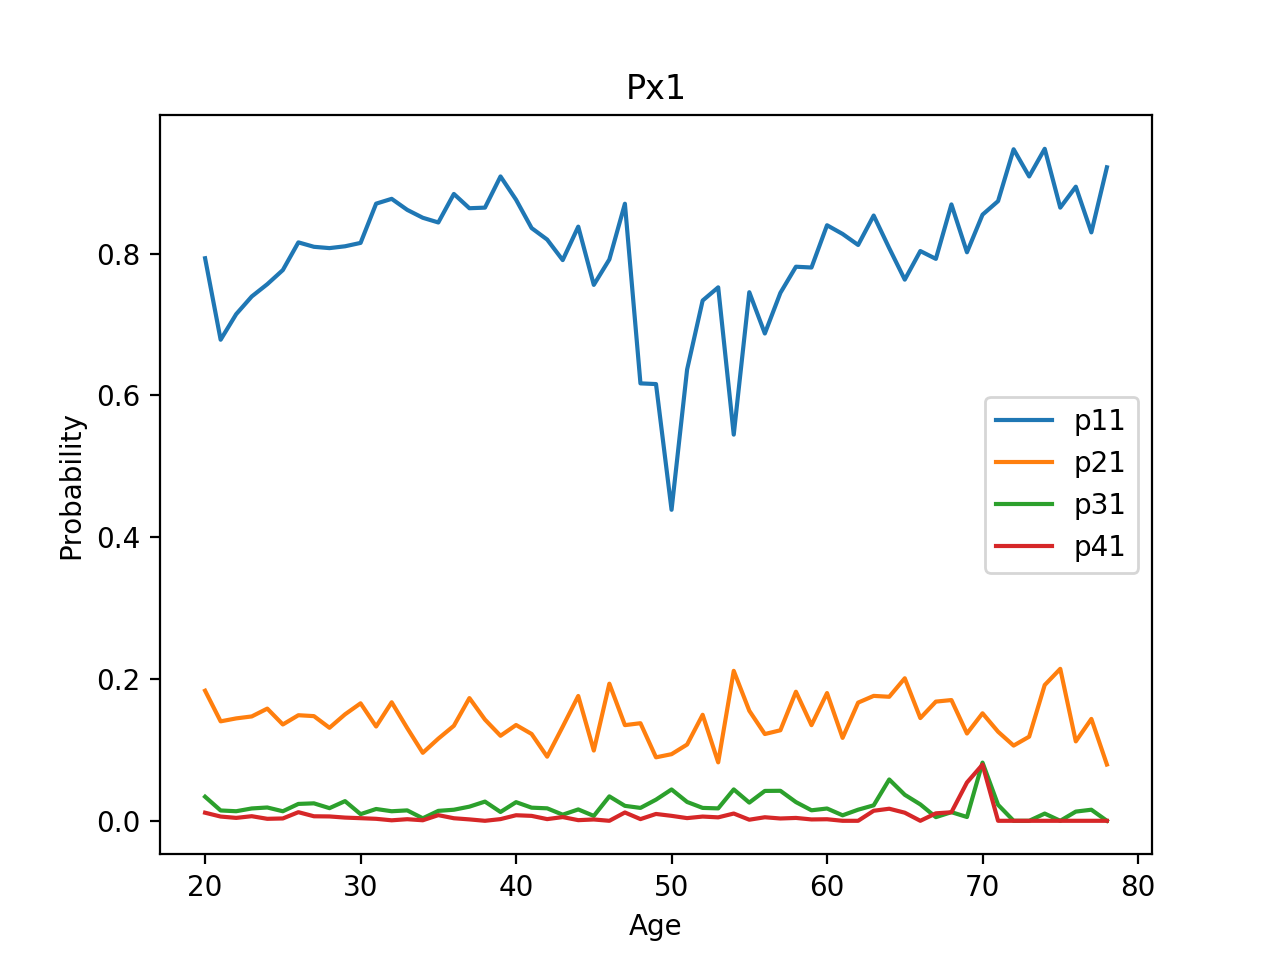

In [160]:
import matplotlib.pyplot as plt
q11=[]
q21=[]
q31=[]
q41=[]
for i in markov1:
    q11.append(i[0][0])
    q21.append(i[1][0])
    q31.append(i[2][0])
    q41.append(i[3][0])
age=np.arange(20,20+len(q11))
markov1.shape
%matplotlib notebook
plt.plot(age,q11,label='p11')
plt.plot(age,q21,label='p21')
plt.plot(age,q31,label='p31')
plt.plot(age,q41,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1')
plt.legend()

<IPython.core.display.Javascript object>


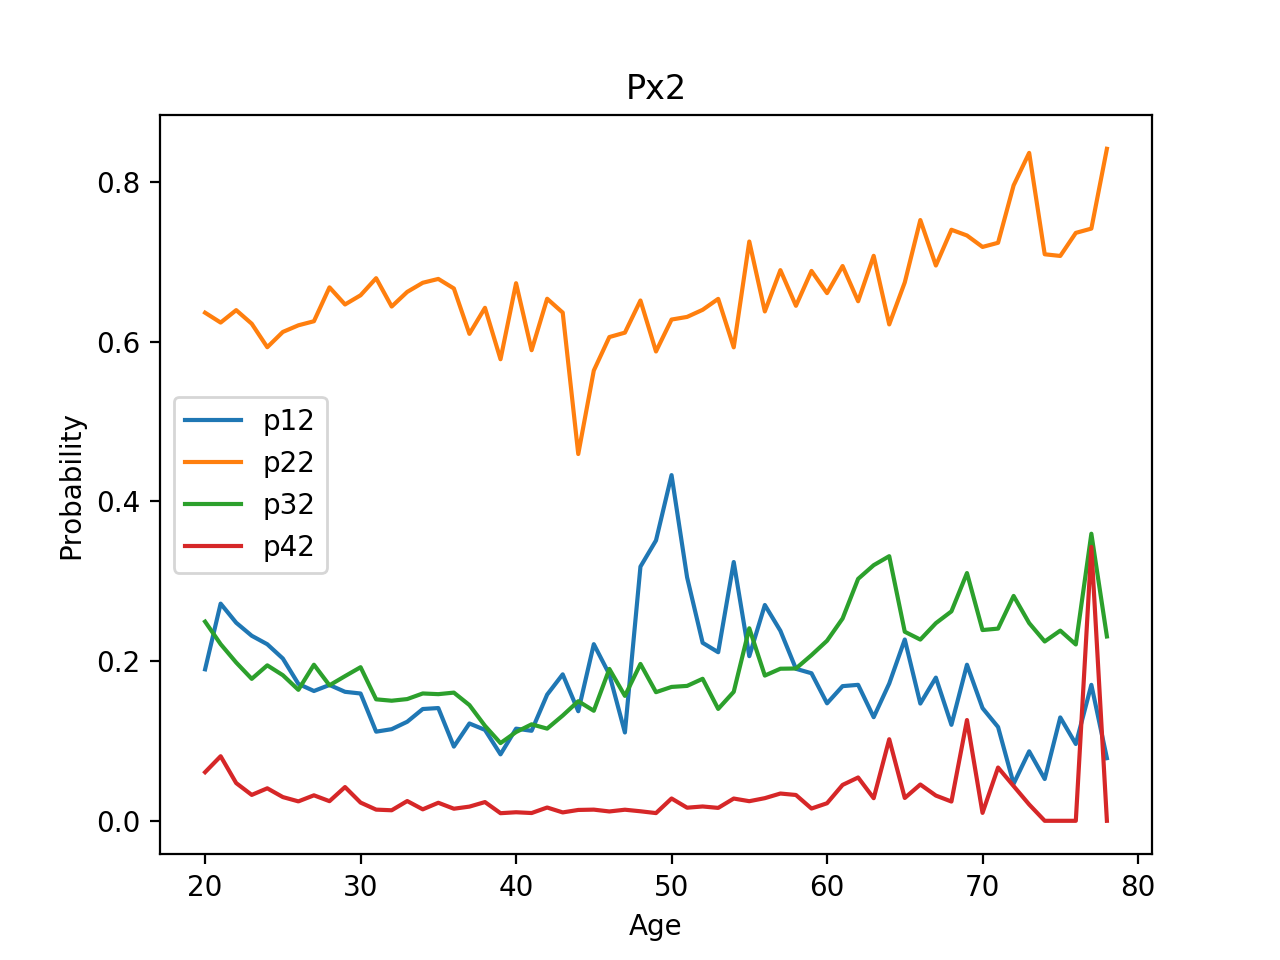

In [161]:
import matplotlib.pyplot as plt
q12=[]
q22=[]
q32=[]
q42=[]
for i in markov1:
    q12.append(i[0][1])
    q22.append(i[1][1])
    q32.append(i[2][1])
    q42.append(i[3][1])
age=np.arange(20,20+len(q11))
markov1.shape
%matplotlib notebook
plt.plot(age,q12,label='p12')
plt.plot(age,q22,label='p22')
plt.plot(age,q32,label='p32')
plt.plot(age,q42,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2')
plt.legend()

<IPython.core.display.Javascript object>


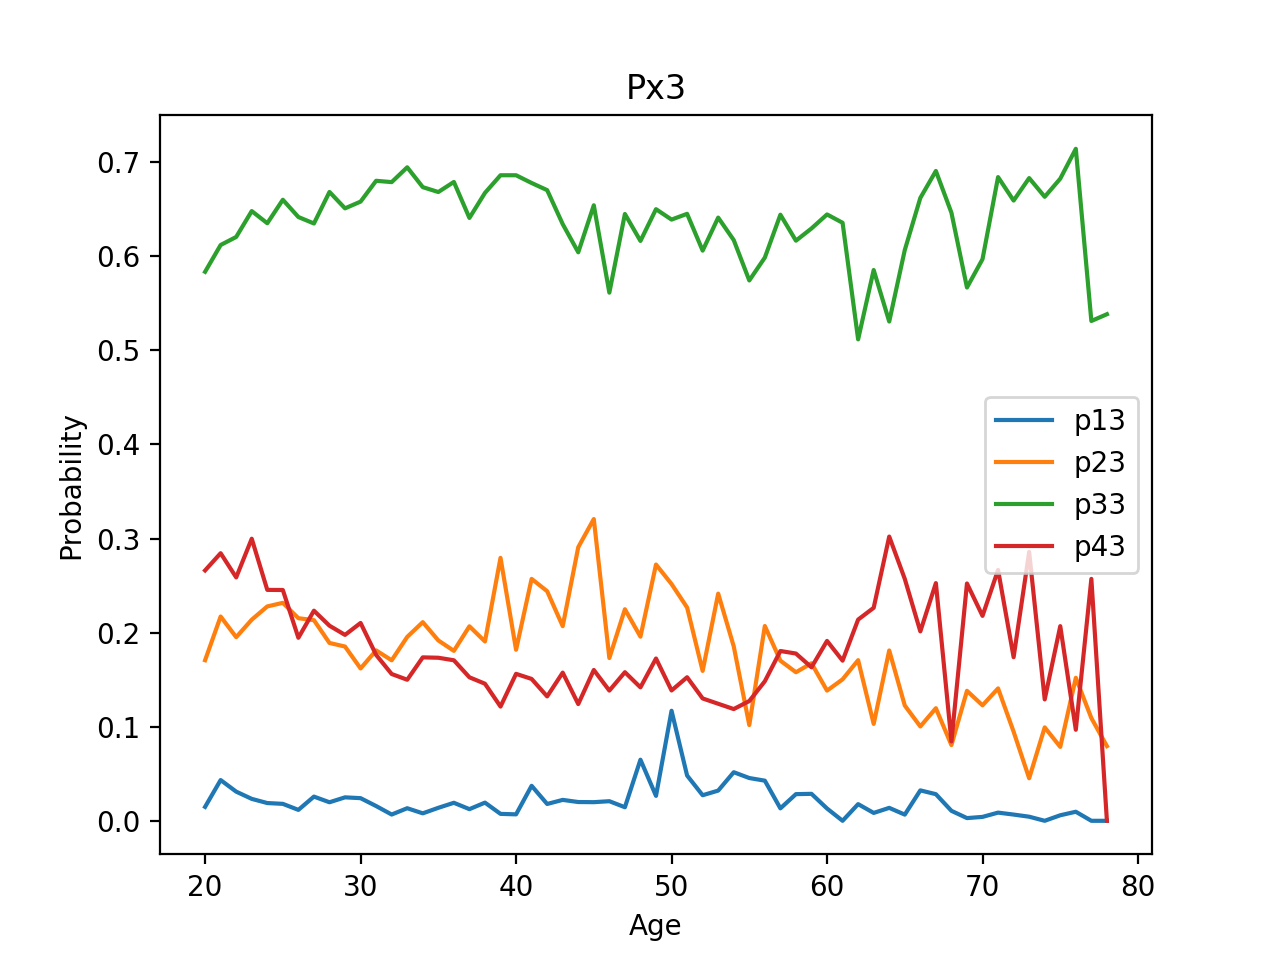

In [162]:
import matplotlib.pyplot as plt
q13=[]
q23=[]
q33=[]
q43=[]
for i in markov1:
    q13.append(i[0][2])
    q23.append(i[1][2])
    q33.append(i[2][2])
    q43.append(i[3][2])
age=np.arange(20,20+len(q11))
markov1.shape
%matplotlib notebook
plt.plot(age,q13,label='p13')
plt.plot(age,q23,label='p23')
plt.plot(age,q33,label='p33')
plt.plot(age,q43,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3')
plt.legend()

In [164]:
statedata = xlrd.open_workbook('/Users/fulinguo/Desktop/chetty.xlsx')

In [165]:
table1 = statedata.sheets()[0]
nrows1 = table1.nrows
columns1=table1.row_values(0)
state0=[]
for i in range(1,nrows1):
    state0.append(table1.row_values(i))
state0=np.array(state0)
state0=pd.DataFrame(state0,columns=columns1)

In [166]:
state0['Gini'] = state0['Gini'].astype(float)
state0['Violent Crime Rate'] = pd.to_numeric(state0['Violent Crime Rate'],errors='coerce')
state0['High School Dropout Rate (Income Adjusted)'] = pd.to_numeric(state0['High School Dropout Rate (Income Adjusted)'],errors='coerce')

In [167]:
stateinf=state0.groupby('State')[['Gini', 'Violent Crime Rate','High School Dropout Rate (Income Adjusted)']].mean()

In [168]:
stateinf['inequality']=stateinf['Gini']>=stateinf['Gini'].median()
stateinf['violent']=stateinf['Violent Crime Rate']>=stateinf['Violent Crime Rate'].median()
stateinf['education']=stateinf['High School Dropout Rate (Income Adjusted)']>=stateinf['High School Dropout Rate (Income Adjusted)'].median()

In [169]:
statecodes=[50,1,3,2,4,5,6,8,7,9,10,51,14,11,12,13,15,16,17,20,19,18,21,22,24,23,25,32,33,26,28,29,30,27,31,34,35,36,37,
           38, 39,40,41,42,43,45,44,46,48,47,49]

In [170]:
stateinf['code']=statecodes
stateinf['education']['CT']=True
stateinf['education']['VT']=True # since lack of high school dropout rate data, using colleges per capital for these two states

/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [171]:
lll=[]
llh=[]
lhl=[]
lhh=[]
hll=[]
hlh=[]
hhl=[]
hhh=[]
for j in range(len(stateinf)):
    ine=stateinf['inequality'][j]
    vio=stateinf['violent'][j]
    edu=stateinf['education'][j]
    if ine & vio & edu:
        hhh.append(stateinf['code'][j])
    elif ine & vio & (edu==False):
        hhl.append(stateinf['code'][j])
    elif ine & (vio==False) & edu:
        hlh.append(stateinf['code'][j])
    elif ine & (vio==False) & (edu==False):
        hll.append(stateinf['code'][j])
    elif (ine==False) & vio & edu:
        lhh.append(stateinf['code'][j])
    elif (ine==False) & (vio==False) & edu:
        llh.append(stateinf['code'][j])
    elif (ine==False) & vio & (edu==False):
        lhl.append(stateinf['code'][j])
    else:
        lll.append(stateinf['code'][j])

In [172]:
print('High inequality, High crime rate, High high school drop out rate:',hhh)
print('High inequality, High crime rate, Low high school drop out rate:',hhl)
print('High inequality, Low crime rate, High high school drop out rate:',hlh)
print('High inequality, Low crime rate, Low high school drop out rate:',hll)
print('Low inequality, High crime rate, High high school drop out rate:',lhh)
print('Low inequality, Low crime rate, High high school drop out rate:',llh)
print('Low inequality, High crime rate, Low high school drop out rate:',lhl)
print('Low inequality, Low crime rate, Low high school drop out rate:',lll)

High inequality, High crime rate, High high school drop out rate: [1, 3, 2, 6, 7, 9, 10, 17, 20, 19, 23, 32, 38]
High inequality, High crime rate, Low high school drop out rate: [4, 29, 30, 31, 39, 41, 42]
High inequality, Low crime rate, High high school drop out rate: [8, 16, 28, 46]
High inequality, Low crime rate, Low high school drop out rate: [45, 47]
Low inequality, High crime rate, High high school drop out rate: [50, 12, 13, 35]
Low inequality, Low crime rate, High high school drop out rate: [51, 11, 24, 25, 44, 49]
Low inequality, High crime rate, Low high school drop out rate: [27, 37]
Low inequality, Low crime rate, Low high school drop out rate: [5, 14, 15, 18, 21, 22, 33, 26, 34, 36, 40, 43, 48]


In [173]:
len(headage_ind)

40

In [174]:
marhhh=[[0]*16]*59
marhhl=[[0]*16]*59
marhlh=[[0]*16]*59
marhll=[[0]*16]*59
marlhh=[[0]*16]*59
marllh=[[0]*16]*59
marlhl=[[0]*16]*59
marlll=[[0]*16]*59
marhhh=np.array(marhhh)
marhhl=np.array(marhhl)
marhlh=np.array(marhlh)
marhll=np.array(marhll)
marlhh=np.array(marlhh)
marllh=np.array(marllh)
marlhl=np.array(marlhl)
marlll=np.array(marlll)
for i in range(len(income)):
    for j in range(len(headage_ind)-2):
        type=16
        if j<=27:
            age=(income.values[i][wanum[j]]+income.values[i][hanum[j]])/2
            inc=income.values[i][incnum[j]]
            age2=(income.values[i][wanum[j+1]]+income.values[i][hanum[j+1]])/2 # set the period interval be 1 year
            inc2=income.values[i][incnum[j+1]]
            loc=income.values[i][stanum[j]]
            #elif j>=23:
            #age=income.values[i][4+5*j]
            #inc=income.values[i][5+5*j]
            #age2=income.values[i][4+5*(j+1)]
            #inc2=income.values[i][5+5*(j+1)]
        if (age>=20) & (age2>=20) & (age<=78) &(age2<=80) & (inc!=0) & (inc2!=0):
            if (inc<inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=0
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=1
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=2
            elif (inc<inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=3
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2<inc_quan[j+1][2]):
                type=4
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=5
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=6
            elif (inc<inc_quan[j][1]) & (inc>=inc_quan[j][2]) & (inc2>=inc_quan[j+1][0]):
                type=7
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2<inc_quan[j+1][2]):
                type=8
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=9
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=10
            elif (inc<inc_quan[j][0]) & (inc>=inc_quan[j][1]) & (inc2>=inc_quan[j+1][0]):
                type=11
            elif (inc>=inc_quan[j][0]) & (inc2<inc_quan[j+1][2]):
                type=12
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][2]) & (inc2<inc_quan[j+1][1]):
                type=13
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][1]) & (inc2<inc_quan[j+1][0]):
                type=14
            elif (inc>=inc_quan[j][0]) & (inc2>=inc_quan[j+1][0]):
                type=15
            if loc in hhh:
                marhhh[int(age)-20][type]+=1
            if loc in hhl:
                marhhl[int(age)-20][type]+=1
            if loc in hlh:
                marhlh[int(age)-20][type]+=1
            if loc in hll:
                marhll[int(age)-20][type]+=1
            if loc in lhh:
                marlhh[int(age)-20][type]+=1
            if loc in llh:
                marllh[int(age)-20][type]+=1
            if loc in lhl:
                marlhl[int(age)-20][type]+=1
            if loc in lll:
                marlll[int(age)-20][type]+=1

In [175]:
marhhh=marhhh.reshape(59,4,4)
marhhl=marhhl.reshape(59,4,4)
marhll=marhll.reshape(59,4,4)
marhlh=marhlh.reshape(59,4,4)
marlhh=marlhh.reshape(59,4,4)
marllh=marllh.reshape(59,4,4)
marlhl=marlhl.reshape(59,4,4)
marlll=marlll.reshape(59,4,4)
markovhhh=[]
markovhhl=[]
markovhlh=[]
markovhll=[]
markovlhh=[]
markovllh=[]
markovlhl=[]
markovlll=[]
for i in range(len(marhhh)):
    for j in range(4):
        sum_quan=sum(marhhh[i][j])
        marhhh[i][j]/max(sum_quan,0.1)
        markovhhh.append(marhhh[i][j]/max(sum_quan,0.1))
markovhhh=np.array(markovhhh)
markovhhh=markovhhh.reshape(59,4,4)
for i in range(len(marhhl)):
    for j in range(4):
        sum_quan=sum(marhhl[i][j])
        marhhl[i][j]/max(sum_quan,0.1)
        markovhhl.append(marhhl[i][j]/max(sum_quan,0.1))
markovhhl=np.array(markovhhl)
markovhhl=markovhhl.reshape(59,4,4)
for i in range(len(marhll)):
    for j in range(4):
        sum_quan=sum(marhll[i][j])
        marhll[i][j]/max(sum_quan,0.1)
        markovhll.append(marhll[i][j]/max(sum_quan,0.1))
markovhll=np.array(markovhll)
markovhll=markovhll.reshape(59,4,4)
for i in range(len(marhlh)):
    for j in range(4):
        sum_quan=sum(marhlh[i][j])
        marhlh[i][j]/max(sum_quan,0.1)
        markovhlh.append(marhlh[i][j]/max(sum_quan,0.1))
markovhlh=np.array(markovhlh)
markovhlh=markovhlh.reshape(59,4,4)
for i in range(len(marlhh)):
    for j in range(4):
        sum_quan=sum(marlhh[i][j])
        marlhh[i][j]/max(sum_quan,0.1)
        markovlhh.append(marlhh[i][j]/max(sum_quan,0.1))
markovlhh=np.array(markovlhh)
markovlhh=markovlhh.reshape(59,4,4)
for i in range(len(marllh)):
    for j in range(4):
        sum_quan=sum(marllh[i][j])
        marllh[i][j]/max(sum_quan,0.1)
        markovllh.append(marllh[i][j]/max(sum_quan,0.1))
markovllh=np.array(markovllh)
markovllh=markovllh.reshape(59,4,4)
for i in range(len(marlhl)):
    for j in range(4):
        sum_quan=sum(marlhl[i][j])
        marlhl[i][j]/max(sum_quan,0.1)
        markovlhl.append(marlhl[i][j]/max(sum_quan,0.1))
markovlhl=np.array(markovlhl)
markovlhl=markovlhl.reshape(59,4,4)
for i in range(len(marlll)):
    for j in range(4):
        sum_quan=sum(marlll[i][j])
        marlll[i][j]/max(sum_quan,0.1)
        markovlll.append(marlll[i][j]/max(sum_quan,0.1))
markovlll=np.array(markovlll)
markovlll=markovlll.reshape(59,4,4)

In [176]:
marhhh # High inequality, High crime rate, High high school drop out rate

array([[[649, 114,   9,   7],
        [124, 345,  75,   7],
        [ 13,  74, 178,  40],
        [  3,   3,  23,  46]],

       [[548, 122,  15,   2],
        [128, 379, 125,  12],
        [ 26,  80, 190,  27],
        [  9,   5,  38,  72]],

       [[516, 102,   6,   3],
        [119, 437, 149,  14],
        [ 15, 100, 259,  54],
        [  1,  38,  47,  83]],

       [[403,  89,   9,   5],
        [ 85, 330, 112,  18],
        [  4,  81, 243,  55],
        [  0,   9,  46, 113]],

       [[297, 118,  11,   3],
        [ 84, 315, 160,  18],
        [ 14, 118, 286,  61],
        [ 12,   6,  58, 116]],

       [[322, 117,  26,  14],
        [ 90, 298, 138,  12],
        [  7, 106, 279,  77],
        [  0,  10,  57, 157]],

       [[296,  73,  10,   3],
        [ 79, 344, 128,  17],
        [ 12, 122, 351,  69],
        [  0,  11,  71, 191]],

       [[427, 102,  10,   2],
        [ 72, 314, 109,  11],
        [ 11,  83, 329,  71],
        [  3,  15,  67, 214]],

       [[342,  84,  13, 

In [177]:
markovhhh

array([[[0.83311938, 0.14634146, 0.01155327, 0.00898588],
        [0.22504537, 0.6261343 , 0.13611615, 0.01270417],
        [0.04262295, 0.24262295, 0.58360656, 0.13114754],
        [0.04      , 0.04      , 0.30666667, 0.61333333]],

       [[0.79767103, 0.1775837 , 0.02183406, 0.00291121],
        [0.19875776, 0.58850932, 0.19409938, 0.01863354],
        [0.08049536, 0.24767802, 0.58823529, 0.08359133],
        [0.07258065, 0.04032258, 0.30645161, 0.58064516]],

       [[0.82296651, 0.16267943, 0.00956938, 0.00478469],
        [0.16550765, 0.6077886 , 0.20723227, 0.01947149],
        [0.03504673, 0.23364486, 0.60514019, 0.12616822],
        [0.00591716, 0.22485207, 0.27810651, 0.49112426]],

       [[0.79644269, 0.17588933, 0.01778656, 0.00988142],
        [0.1559633 , 0.60550459, 0.20550459, 0.03302752],
        [0.01044386, 0.21148825, 0.63446475, 0.14360313],
        [0.        , 0.05357143, 0.27380952, 0.67261905]],

       [[0.69230769, 0.27505828, 0.02564103, 0.00699301],
      

In [178]:
marhhl # High inequality, High crime rate, Low high school drop out rate

array([[[512, 106,  14,  14],
        [115, 299,  98,  10],
        [ 15, 111, 178,  42],
        [  2,   8,  35,  68]],

       [[539, 117,  21,  14],
        [ 91, 348, 108,  12],
        [ 16,  74, 240,  67],
        [  2,   6,  34,  76]],

       [[362, 133,  11,   8],
        [119, 400, 128,  21],
        [ 12,  89, 281,  92],
        [  1,  16,  36, 110]],

       [[305,  93,  11,   9],
        [ 73, 299, 135,  14],
        [ 10,  80, 309,  87],
        [  4,   1,  64, 171]],

       [[243,  69,  15,  10],
        [ 74, 390, 113,  19],
        [  5,  83, 340,  83],
        [  3,  10,  61, 178]],

       [[261,  80,  20,  10],
        [ 91, 286, 107,  22],
        [  6, 106, 400, 110],
        [  2,  15,  78, 255]],

       [[273,  76,  11,   5],
        [ 71, 293,  78,  19],
        [  9, 117, 338,  98],
        [  4,   8,  62, 270]],

       [[335,  56,  12,  12],
        [ 77, 283, 132,  22],
        [ 10,  92, 358, 116],
        [  4,   8,  97, 318]],

       [[313,  84,  10, 

In [179]:
markovhhl

array([[[0.79256966, 0.16408669, 0.02167183, 0.02167183],
        [0.22030651, 0.57279693, 0.18773946, 0.01915709],
        [0.0433526 , 0.32080925, 0.51445087, 0.12138728],
        [0.01769912, 0.07079646, 0.30973451, 0.60176991]],

       [[0.78002894, 0.16931983, 0.03039074, 0.02026049],
        [0.1627907 , 0.62254025, 0.19320215, 0.02146691],
        [0.04030227, 0.18639798, 0.60453401, 0.16876574],
        [0.01694915, 0.05084746, 0.28813559, 0.6440678 ]],

       [[0.70428016, 0.25875486, 0.02140078, 0.0155642 ],
        [0.17814371, 0.5988024 , 0.19161677, 0.03143713],
        [0.02531646, 0.18776371, 0.592827  , 0.19409283],
        [0.00613497, 0.09815951, 0.2208589 , 0.67484663]],

       [[0.72966507, 0.22248804, 0.02631579, 0.0215311 ],
        [0.14011516, 0.57389635, 0.25911708, 0.0268714 ],
        [0.02057613, 0.16460905, 0.63580247, 0.17901235],
        [0.01666667, 0.00416667, 0.26666667, 0.7125    ]],

       [[0.72106825, 0.20474777, 0.04451039, 0.02967359],
      

In [180]:
marhlh # High inequality, Low crime rate, High high school drop out rate

array([[[87, 11,  3,  0],
        [ 8, 44, 11,  1],
        [ 1, 11, 30, 12],
        [ 0,  0,  5,  9]],

       [[74,  8,  3,  0],
        [20, 36, 28,  1],
        [ 2,  9, 32, 15],
        [ 1,  3,  8, 13]],

       [[47,  7,  1,  2],
        [11, 40, 23,  1],
        [ 0, 16, 37,  9],
        [ 0,  1,  9, 32]],

       [[53,  4,  5,  0],
        [ 8, 80, 29,  3],
        [ 1, 11, 72, 16],
        [ 1,  2, 11, 18]],

       [[18, 23,  8,  5],
        [ 8, 47, 21,  2],
        [ 3, 18, 73,  8],
        [ 0,  2,  7, 28]],

       [[36, 22,  0,  0],
        [ 7, 53, 19,  4],
        [ 2, 17, 58, 13],
        [ 0,  2, 11, 36]],

       [[40,  9,  2,  0],
        [14, 63, 18,  1],
        [ 2, 15, 61, 14],
        [ 1,  2, 11, 40]],

       [[72,  8,  3,  2],
        [11, 49, 22,  4],
        [ 2, 13, 72, 11],
        [ 0,  1, 20, 41]],

       [[43, 13,  1,  1],
        [19, 56, 12,  1],
        [ 3, 21, 56, 25],
        [ 1, 11, 12, 47]],

       [[44, 13,  1,  1],
        [ 5, 44, 18,

In [181]:
markovhlh

array([[[0.86138614, 0.10891089, 0.02970297, 0.        ],
        [0.125     , 0.6875    , 0.171875  , 0.015625  ],
        [0.01851852, 0.2037037 , 0.55555556, 0.22222222],
        [0.        , 0.        , 0.35714286, 0.64285714]],

       [[0.87058824, 0.09411765, 0.03529412, 0.        ],
        [0.23529412, 0.42352941, 0.32941176, 0.01176471],
        [0.03448276, 0.15517241, 0.55172414, 0.25862069],
        [0.04      , 0.12      , 0.32      , 0.52      ]],

       [[0.8245614 , 0.12280702, 0.01754386, 0.03508772],
        [0.14666667, 0.53333333, 0.30666667, 0.01333333],
        [0.        , 0.25806452, 0.59677419, 0.14516129],
        [0.        , 0.02380952, 0.21428571, 0.76190476]],

       [[0.85483871, 0.06451613, 0.08064516, 0.        ],
        [0.06666667, 0.66666667, 0.24166667, 0.025     ],
        [0.01      , 0.11      , 0.72      , 0.16      ],
        [0.03125   , 0.0625    , 0.34375   , 0.5625    ]],

       [[0.33333333, 0.42592593, 0.14814815, 0.09259259],
      

<IPython.core.display.Javascript object>


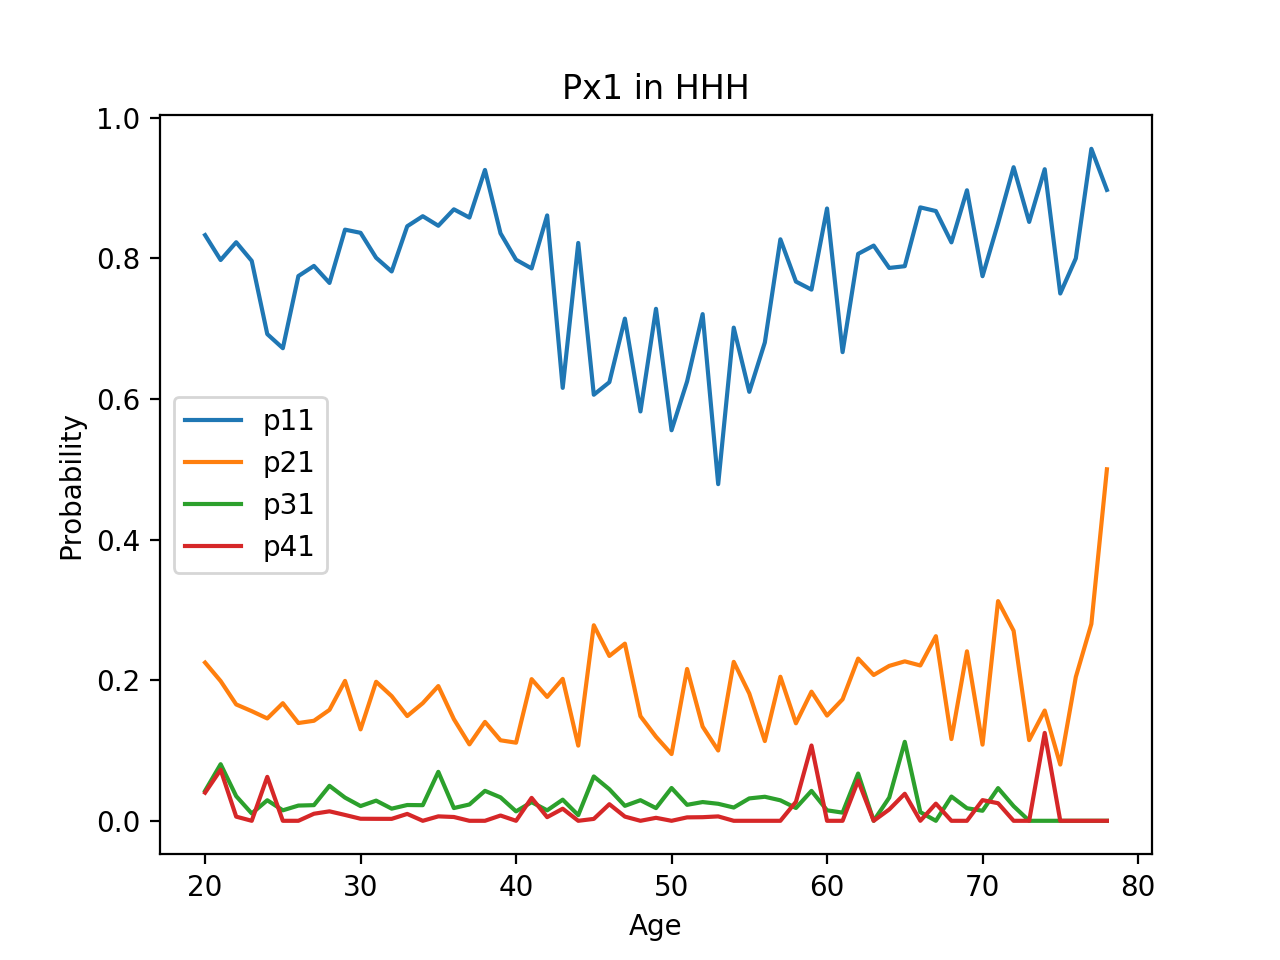

In [182]:
import matplotlib.pyplot as plt
m11hhh=[]
m21hhh=[]
m31hhh=[]
m41hhh=[]
for i in markovhhh:
    m11hhh.append(i[0][0])
    m21hhh.append(i[1][0])
    m31hhh.append(i[2][0])
    m41hhh.append(i[3][0])
age=np.arange(20,20+len(m11hhh))
markov1.shape
%matplotlib notebook
plt.plot(age,m11hhh,label='p11')
plt.plot(age,m21hhh,label='p21')
plt.plot(age,m31hhh,label='p31')
plt.plot(age,m41hhh,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1 in HHH')
plt.legend()

<IPython.core.display.Javascript object>


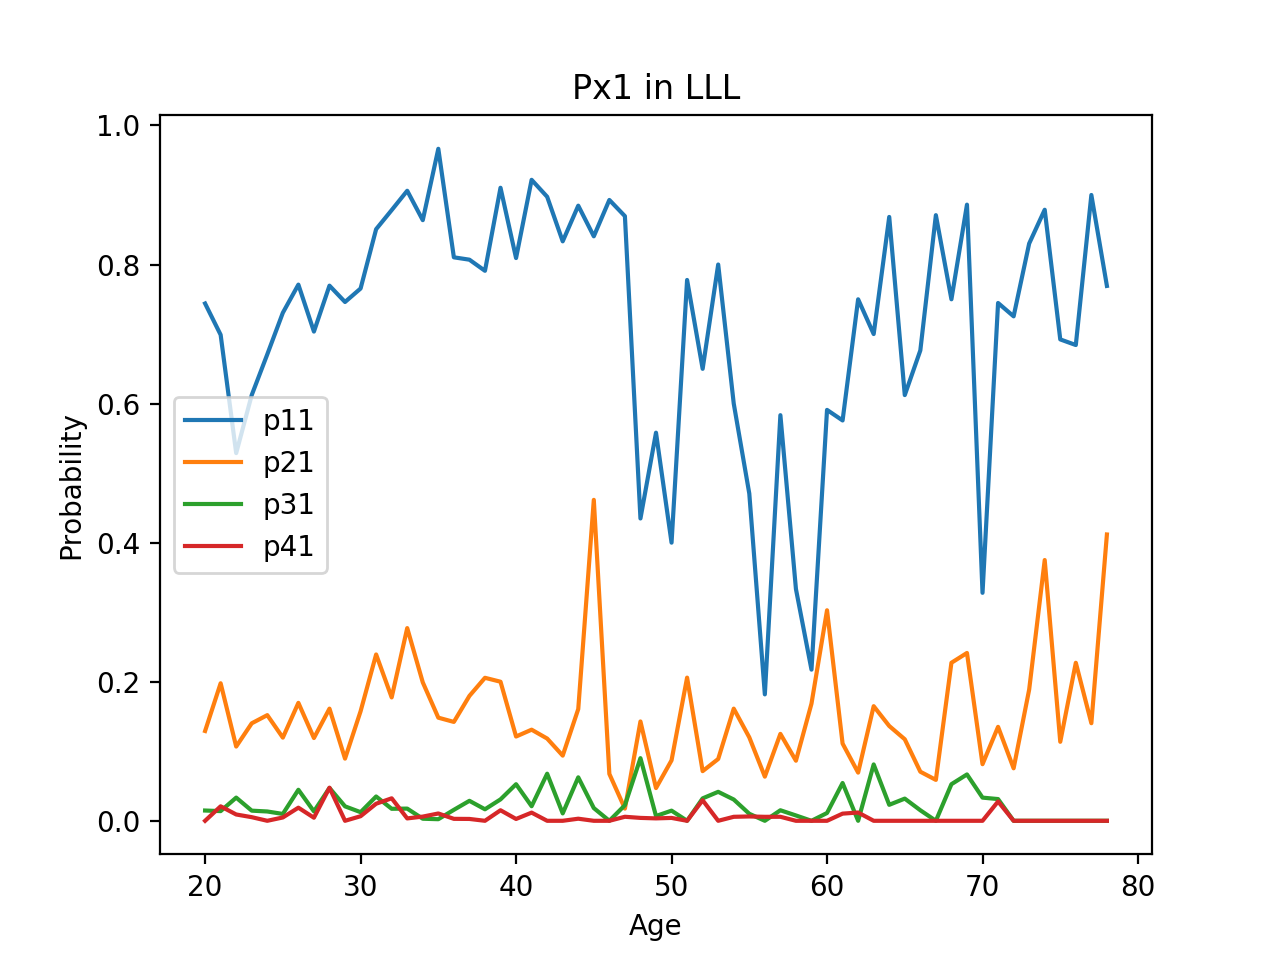

In [183]:
import matplotlib.pyplot as plt
m11lll=[]
m21lll=[]
m31lll=[]
m41lll=[]
for i in markovlll:
    m11lll.append(i[0][0])
    m21lll.append(i[1][0])
    m31lll.append(i[2][0])
    m41lll.append(i[3][0])
age=np.arange(20,20+len(m11lll))
%matplotlib notebook
plt.plot(age,m11lll,label='p11')
plt.plot(age,m21lll,label='p21')
plt.plot(age,m31lll,label='p31')
plt.plot(age,m41lll,label='p41')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px1 in LLL')
plt.legend()

<IPython.core.display.Javascript object>


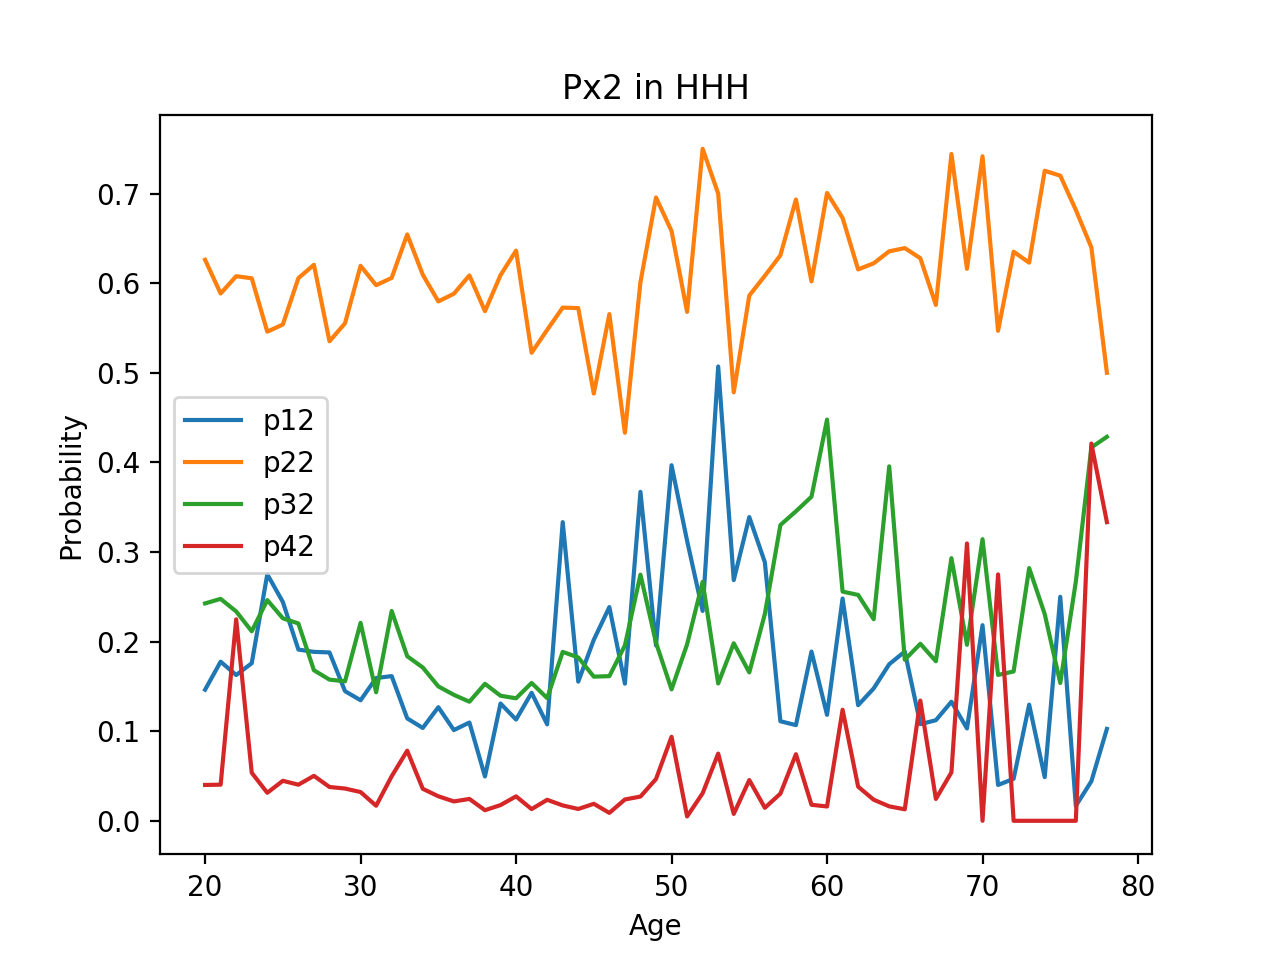

In [184]:
import matplotlib.pyplot as plt
m12hhh=[]
m22hhh=[]
m32hhh=[]
m42hhh=[]
for i in markovhhh:
    m12hhh.append(i[0][1])
    m22hhh.append(i[1][1])
    m32hhh.append(i[2][1])
    m42hhh.append(i[3][1])
age=np.arange(20,20+len(m11hhh))
markov1.shape
%matplotlib notebook
plt.plot(age,m12hhh,label='p12')
plt.plot(age,m22hhh,label='p22')
plt.plot(age,m32hhh,label='p32')
plt.plot(age,m42hhh,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2 in HHH')
plt.legend()

<IPython.core.display.Javascript object>


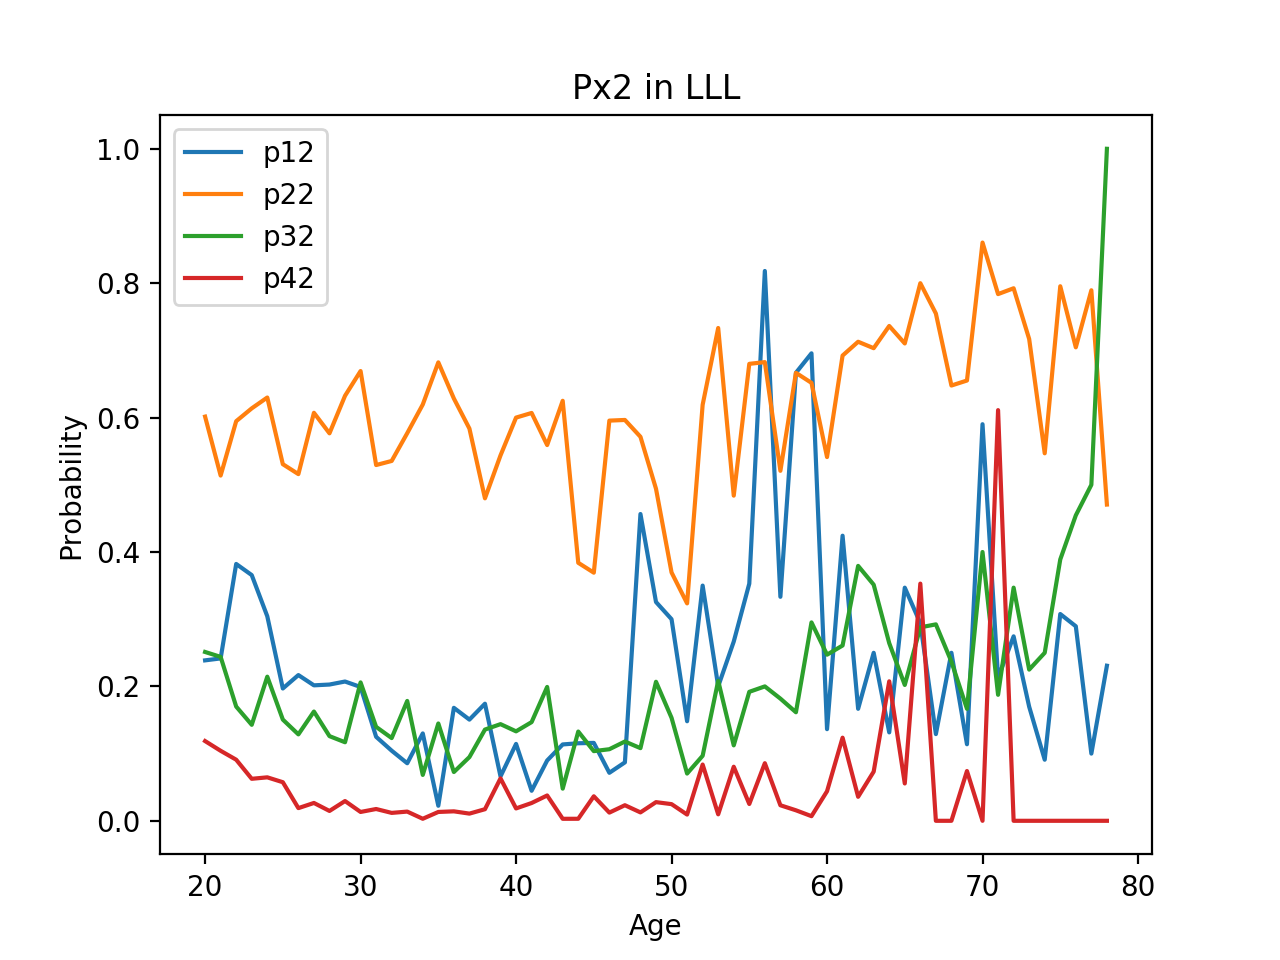

In [185]:
import matplotlib.pyplot as plt
m12lll=[]
m22lll=[]
m32lll=[]
m42lll=[]
for i in markovlll:
    m12lll.append(i[0][1])
    m22lll.append(i[1][1])
    m32lll.append(i[2][1])
    m42lll.append(i[3][1])
age=np.arange(20,20+len(m11lll))
%matplotlib notebook
plt.plot(age,m12lll,label='p12')
plt.plot(age,m22lll,label='p22')
plt.plot(age,m32lll,label='p32')
plt.plot(age,m42lll,label='p42')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px2 in LLL')
plt.legend()

<IPython.core.display.Javascript object>


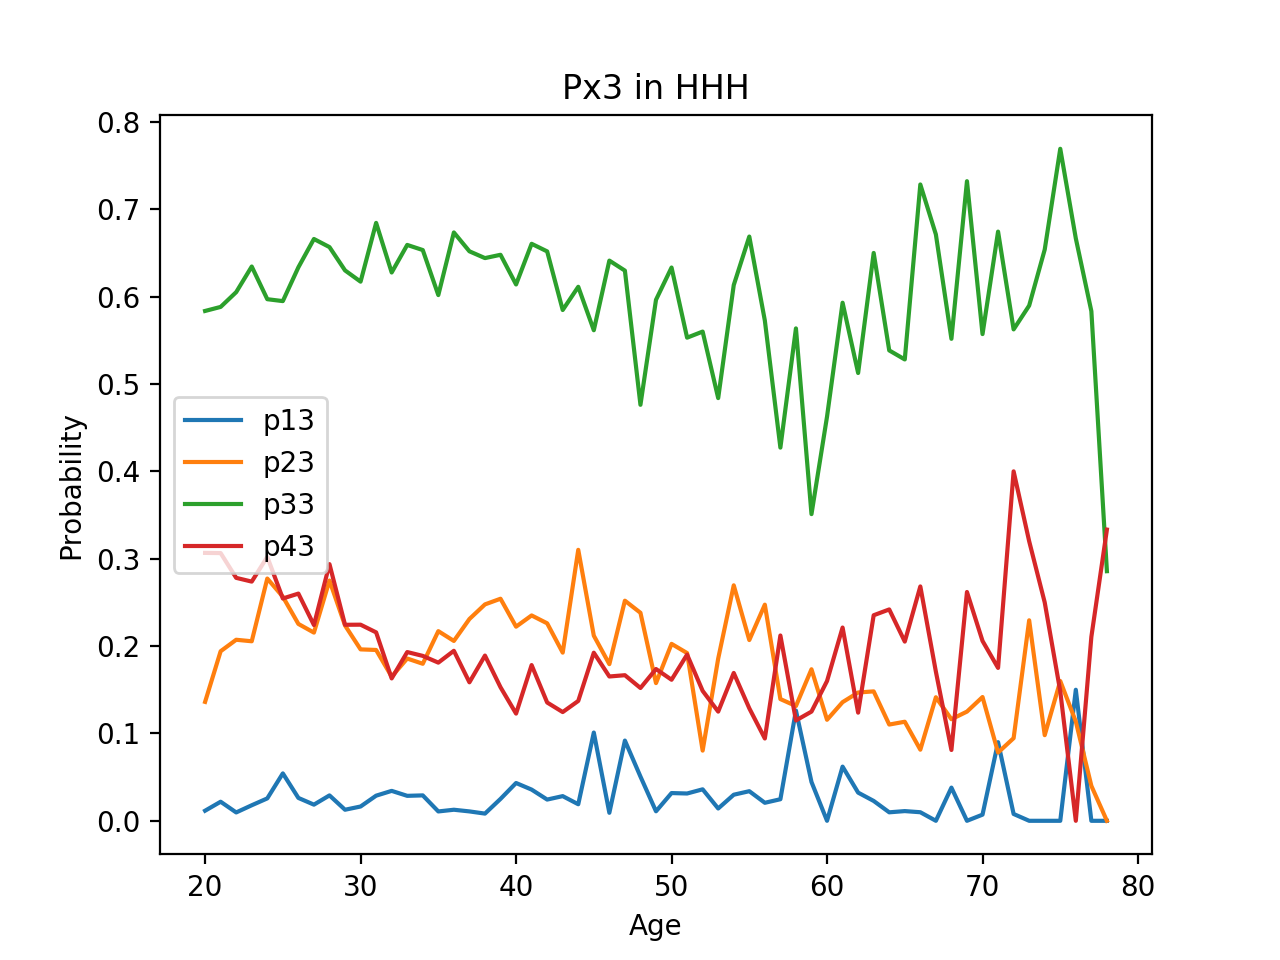

In [186]:
import matplotlib.pyplot as plt
m13hhh=[]
m23hhh=[]
m33hhh=[]
m43hhh=[]
for i in markovhhh:
    m13hhh.append(i[0][2])
    m23hhh.append(i[1][2])
    m33hhh.append(i[2][2])
    m43hhh.append(i[3][2])
age=np.arange(20,20+len(m11hhh))
%matplotlib notebook
plt.plot(age,m13hhh,label='p13')
plt.plot(age,m23hhh,label='p23')
plt.plot(age,m33hhh,label='p33')
plt.plot(age,m43hhh,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3 in HHH')
plt.legend()

<IPython.core.display.Javascript object>


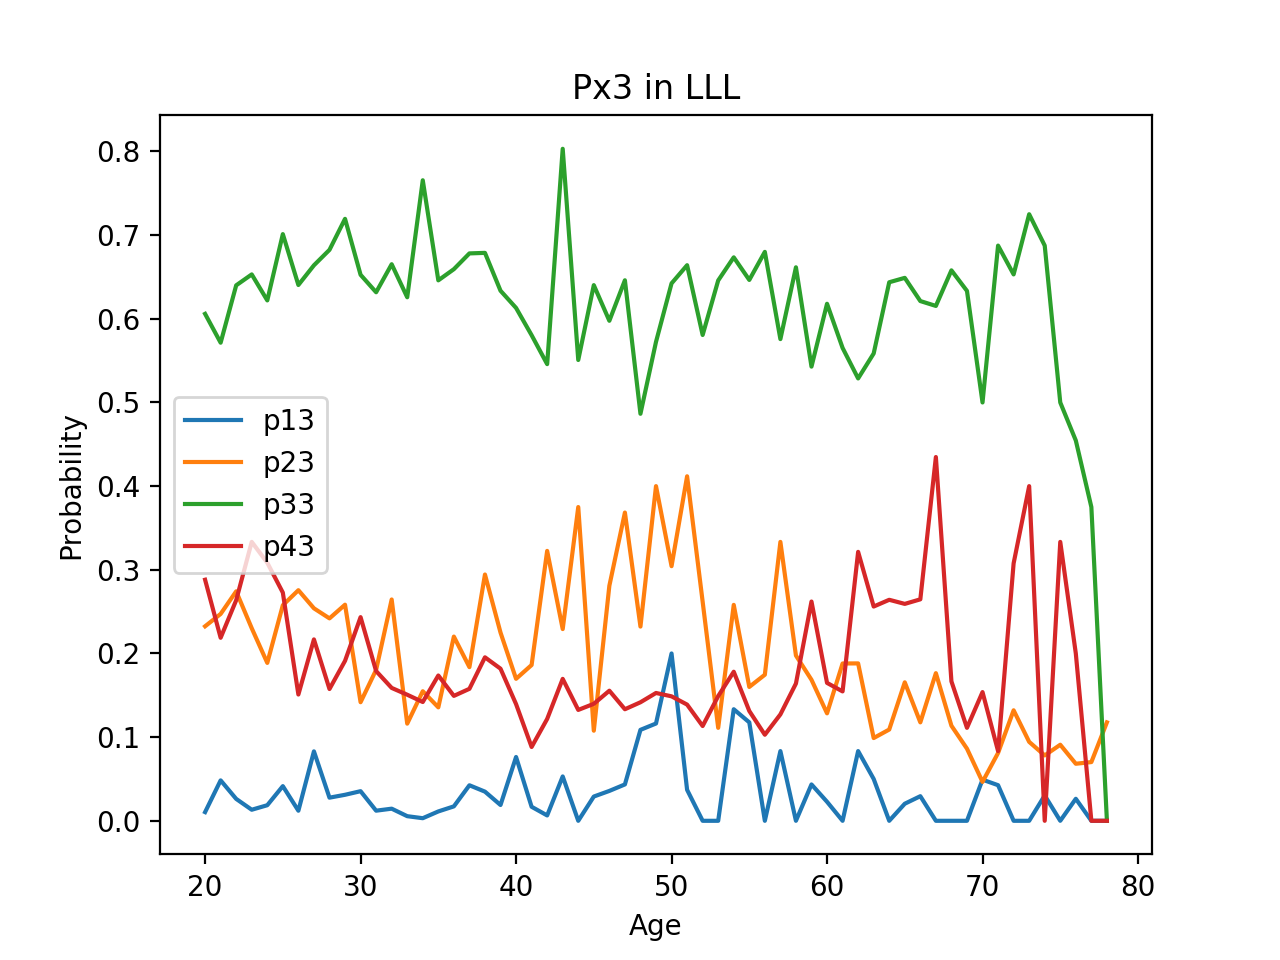

In [187]:
import matplotlib.pyplot as plt
m13lll=[]
m23lll=[]
m33lll=[]
m43lll=[]
for i in markovlll:
    m13lll.append(i[0][2])
    m23lll.append(i[1][2])
    m33lll.append(i[2][2])
    m43lll.append(i[3][2])
age=np.arange(20,20+len(m11lll))
%matplotlib notebook
plt.plot(age,m13lll,label='p13')
plt.plot(age,m23lll,label='p23')
plt.plot(age,m33lll,label='p33')
plt.plot(age,m43lll,label='p43')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px3 in LLL')
plt.legend()

<IPython.core.display.Javascript object>


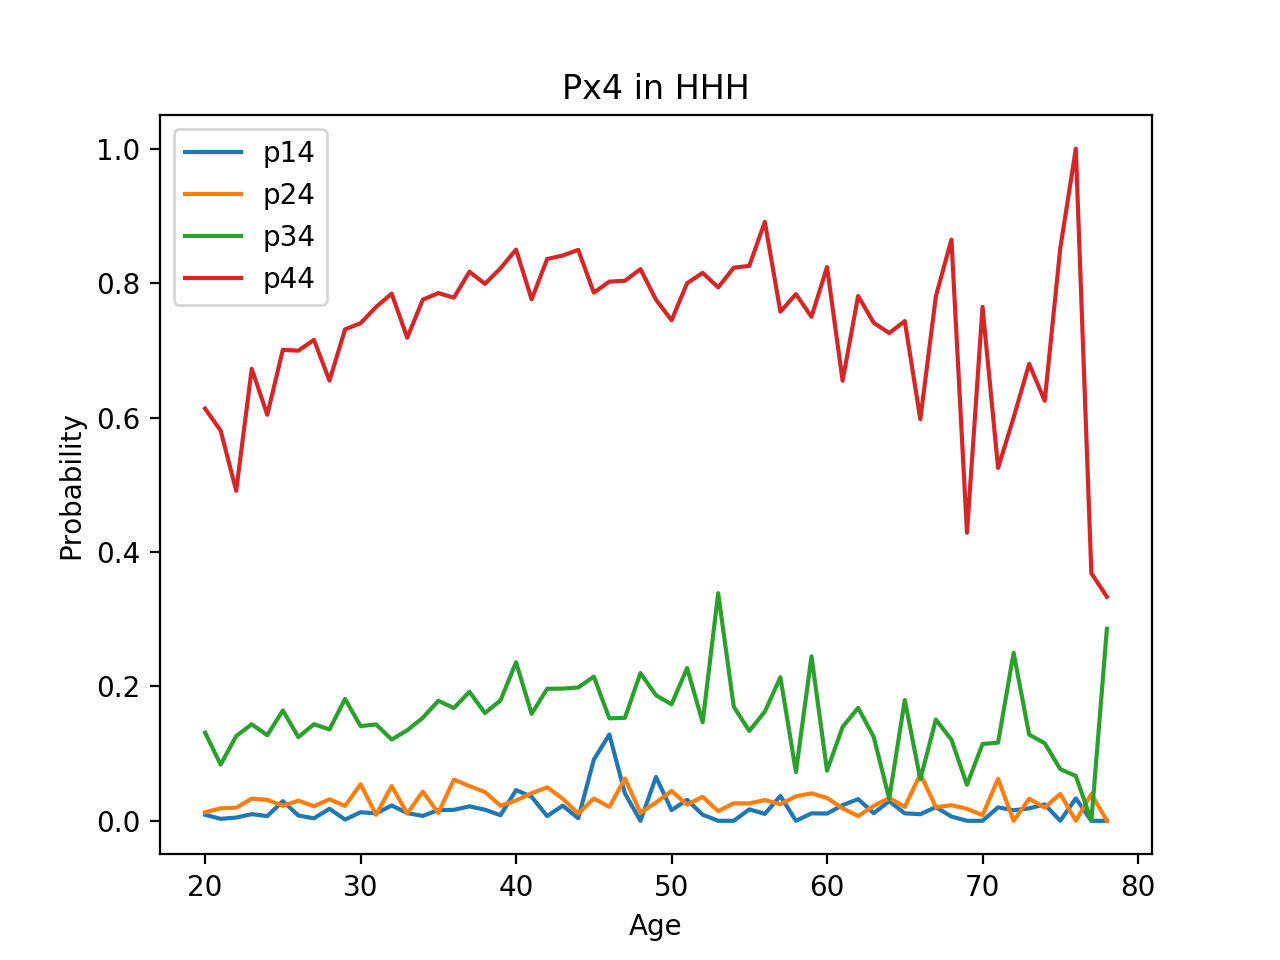

In [188]:
import matplotlib.pyplot as plt
m14hhh=[]
m24hhh=[]
m34hhh=[]
m44hhh=[]
for i in markovhhh:
    m14hhh.append(i[0][3])
    m24hhh.append(i[1][3])
    m34hhh.append(i[2][3])
    m44hhh.append(i[3][3])
age=np.arange(20,20+len(m11hhh))
%matplotlib notebook
plt.plot(age,m14hhh,label='p14')
plt.plot(age,m24hhh,label='p24')
plt.plot(age,m34hhh,label='p34')
plt.plot(age,m44hhh,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px4 in HHH')
plt.legend()

<IPython.core.display.Javascript object>


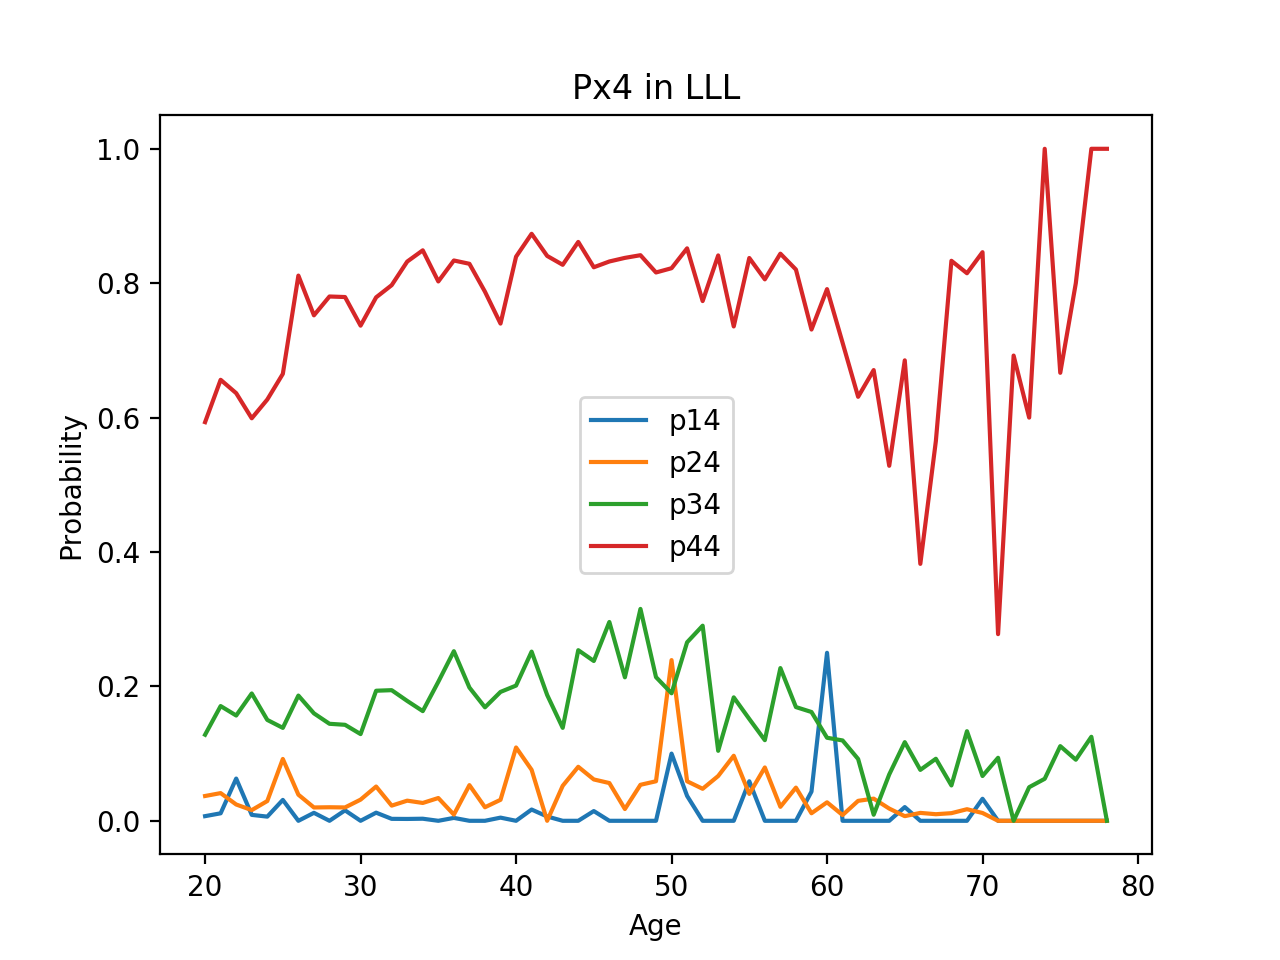

In [189]:
import matplotlib.pyplot as plt
m14lll=[]
m24lll=[]
m34lll=[]
m44lll=[]
for i in markovlll:
    m14lll.append(i[0][3])
    m24lll.append(i[1][3])
    m34lll.append(i[2][3])
    m44lll.append(i[3][3])
age=np.arange(20,20+len(m11hhh))
%matplotlib notebook
plt.plot(age,m14lll,label='p14')
plt.plot(age,m24lll,label='p24')
plt.plot(age,m34lll,label='p34')
plt.plot(age,m44lll,label='p44')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Px4 in LLL')
plt.legend()

<IPython.core.display.Javascript object>


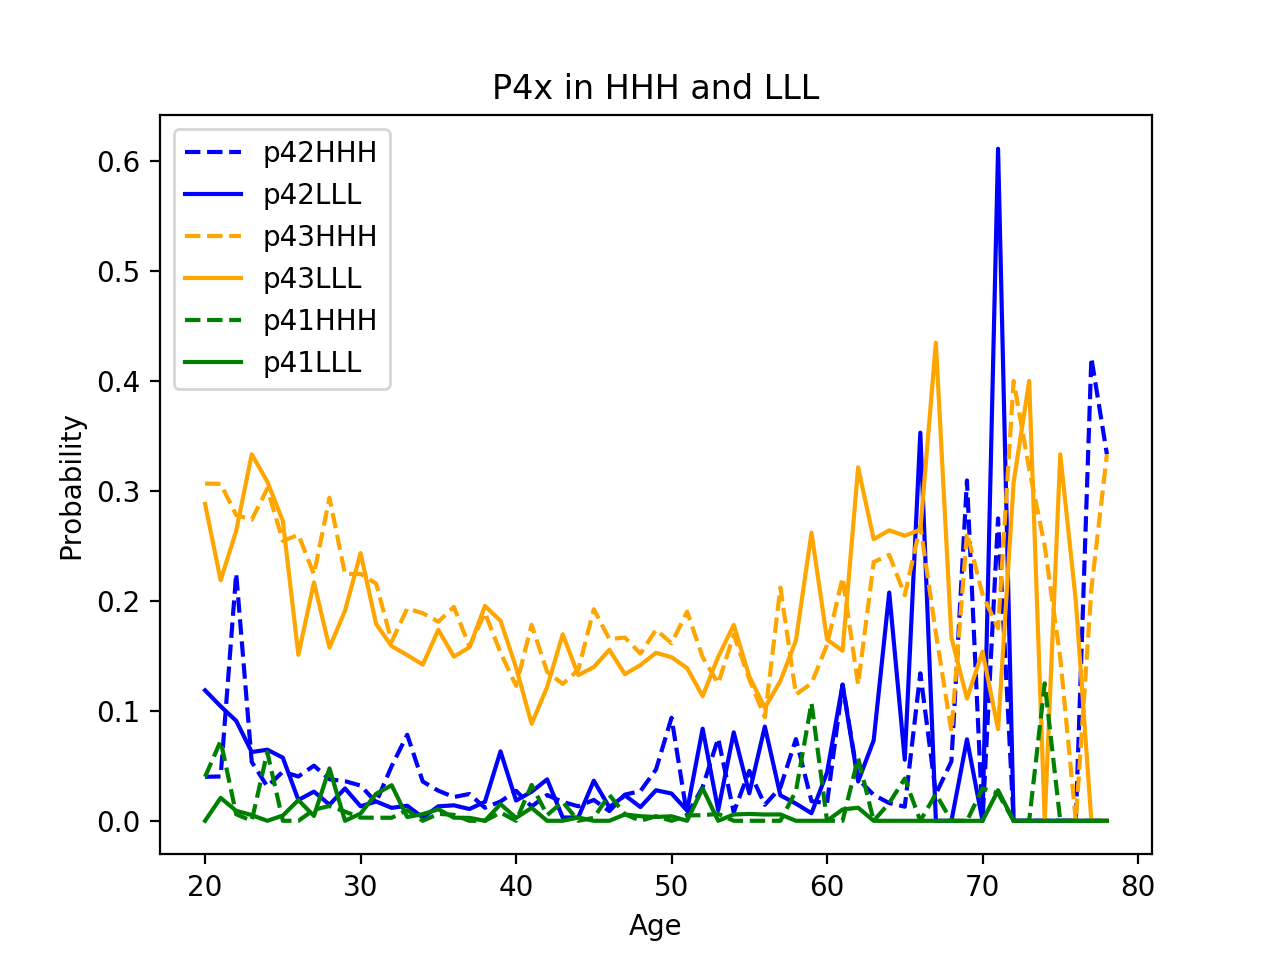

In [190]:
%matplotlib notebook
plt.plot(age,m42hhh,label='p42HHH',color='blue',linestyle='dashed')
plt.plot(age,m42lll,label='p42LLL',color='blue')
plt.plot(age,m43hhh,label='p43HHH',color='orange',linestyle='dashed')
plt.plot(age,m43lll,label='p43LLL',color='orange')
plt.plot(age,m41hhh,label='p41HHH',color='green',linestyle='dashed')
plt.plot(age,m41lll,label='p41LLL',color='green')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P4x in HHH and LLL')
plt.legend()

<IPython.core.display.Javascript object>


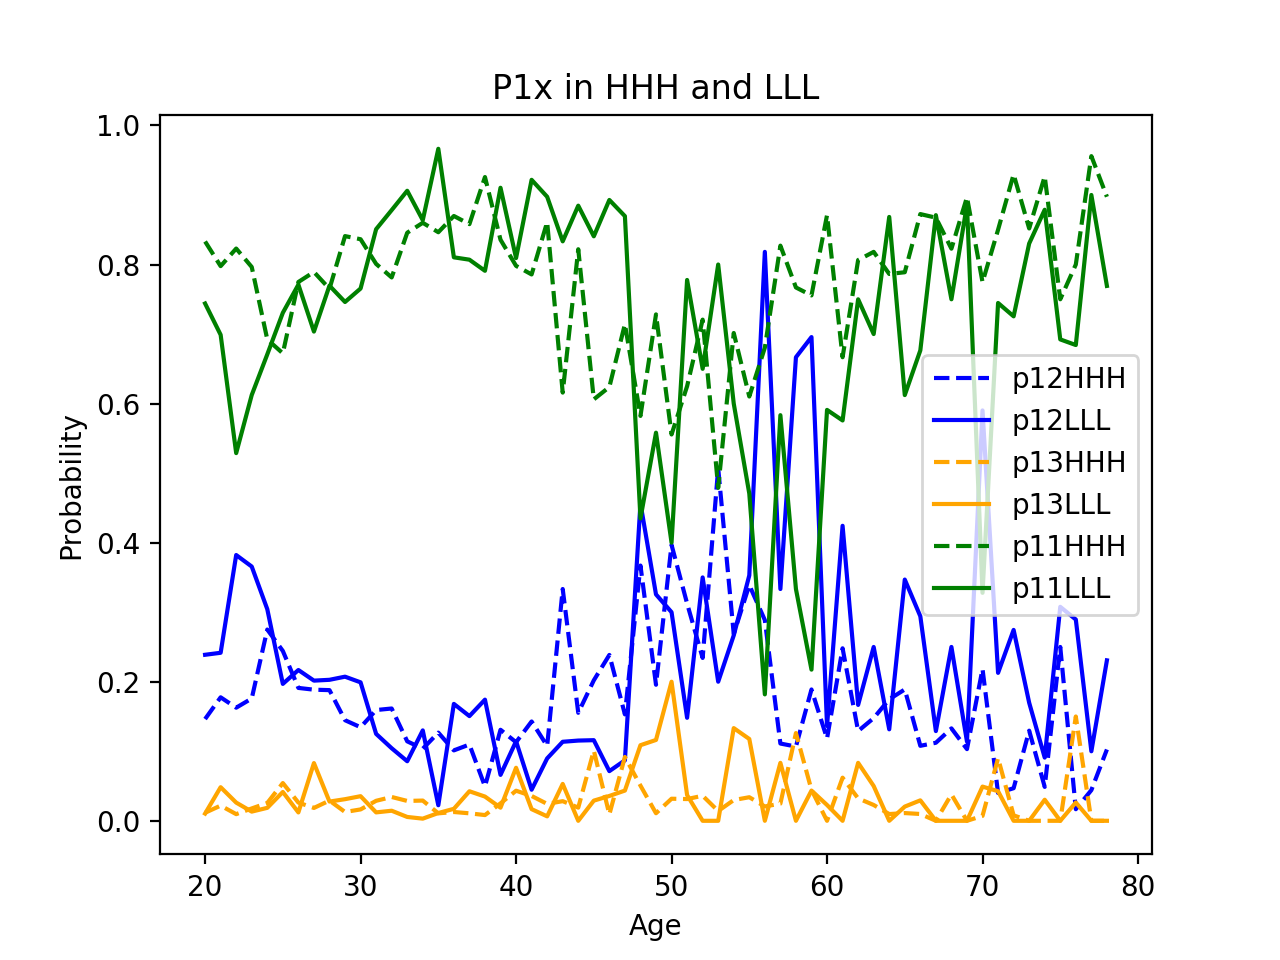

In [191]:
%matplotlib notebook
plt.plot(age,m12hhh,label='p12HHH',color='blue',linestyle='dashed')
plt.plot(age,m12lll,label='p12LLL',color='blue')
plt.plot(age,m13hhh,label='p13HHH',color='orange',linestyle='dashed')
plt.plot(age,m13lll,label='p13LLL',color='orange')
plt.plot(age,m11hhh,label='p11HHH',color='green',linestyle='dashed')
plt.plot(age,m11lll,label='p11LLL',color='green')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('P1x in HHH and LLL')
plt.legend()

In [198]:
print('The summation of p42_hhh w.r.t age:',sum(m42hhh))
print('The summation of p42_lll w.r.t age:',sum(m42lll))

The summation of p42_hhh w.r.t age: 3.3100149183853014
The summation of p42_lll w.r.t age: 2.907996473239007


In [201]:
print('The summation of p41_hhh w.r.t age:',sum(m41hhh))
print('The summation of p41_lll w.r.t age:',sum(m41lll))

The summation of p41_hhh w.r.t age: 0.8077620360075455
The summation of p41_lll w.r.t age: 0.3529745724793562


In [202]:
print('The summation of p43_hhh w.r.t age:',sum(m43hhh))
print('The summation of p43_lll w.r.t age:',sum(m43lll))

The summation of p43_hhh w.r.t age: 11.615225208439059
The summation of p43_lll w.r.t age: 10.899450476185338


In [203]:
print('The summation of p32_hhh w.r.t age:',sum(m32hhh))
print('The summation of p32_lll w.r.t age:',sum(m32lll))

The summation of p32_hhh w.r.t age: 13.007239773610715
The summation of p32_lll w.r.t age: 12.430700726458118


In [204]:
print('The summation of p31_hhh w.r.t age:',sum(m31hhh))
print('The summation of p31_lll w.r.t age:',sum(m31lll))

The summation of p31_hhh w.r.t age: 1.5878620346546162
The summation of p31_lll w.r.t age: 1.3103399471062007


In [205]:
print('The summation of p12_hhh w.r.t age:',sum(m12hhh))
print('The summation of p12_lll w.r.t age:',sum(m12lll))

The summation of p12_hhh w.r.t age: 10.207342249107468
The summation of p12_lll w.r.t age: 13.958231784094247


In [206]:
print('The summation of p13_hhh w.r.t age:',sum(m13hhh))
print('The summation of p13_lll w.r.t age:',sum(m13lll))

The summation of p13_hhh w.r.t age: 1.6788370363681886
The summation of p13_lll w.r.t age: 1.9618883167915715


In [210]:
print('The summation of p14_hhh w.r.t age:',sum(m14hhh))
print('The summation of p14_lll w.r.t age:',sum(m14lll))
print('Not consistent with the hypothesis')

The summation of p14_hhh w.r.t age: 1.0759763416456258
The summation of p14_lll w.r.t age: 0.7644893608349471
Not consistent with the hypothesis


In [208]:
print('The summation of p24_hhh w.r.t age:',sum(m24hhh))
print('The summation of p24_lll w.r.t age:',sum(m24lll))

The summation of p24_hhh w.r.t age: 1.6961348053435594
The summation of p24_lll w.r.t age: 2.108044476758565


In [209]:
print('The summation of p34_hhh w.r.t age:',sum(m34hhh))
print('The summation of p34_lll w.r.t age:',sum(m34lll))

The summation of p34_hhh w.r.t age: 8.989246018000069
The summation of p34_lll w.r.t age: 9.099836312697155


In [52]:
markovhhh[0]

array([[0.83311938, 0.14634146, 0.01155327, 0.00898588],
       [0.22504537, 0.6261343 , 0.13611615, 0.01270417],
       [0.04262295, 0.24262295, 0.58360656, 0.13114754],
       [0.04      , 0.04      , 0.30666667, 0.61333333]])

In [100]:
from bokeh.io import show
from bokeh.models import LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.plotting import figure
from bokeh.models.sources import ColumnDataSource
from math import pi
from bokeh.transform import transform

In [126]:
df=[]
Bigmarkov=[markovhhh,markovhlh,markovhhl,markovhll,markovlhh,markovllh,markovlhl,markovlll]
for i in range(8):
    for j in range(59):
        df.extend([Bigmarkov[i][j][0][::-1],Bigmarkov[i][j][1][::-1],Bigmarkov[i][j][2][::-1],Bigmarkov[i][j][3][::-1]])

In [127]:
len(df)

1888

In [130]:
columns=['Q4','Q3','Q2','Q1']
index=[]
for i in range(8):
    for j in range(59):
        a1='Q1'+'_'+str(i)+'_'+str(j+20)
        a2='Q2'+'_'+str(i)+'_'+str(j+20)
        a3='Q3'+'_'+str(i)+'_'+str(j)
        a4='Q4'+'_'+str(i)+'_'+str(j)
        a=[a1,a2,a3,a4]
        index.extend(a)

In [131]:
#df=[markovhhh[0][0][::-1],markovhhh[0][1][::-1],markovhhh[0][2][::-1],markovhhh[0][3][::-1]]
df=pd.DataFrame(df,columns=columns,index=index)
df.index.name = 'Period1'
df.columns.name = 'Period2'
df
df = df.stack().rename("value").reset_index()
df

,Period1,Period2,value
0,Q1_0_20,Q4,0.008986
1,Q1_0_20,Q3,0.011553
2,Q1_0_20,Q2,0.146341
3,Q1_0_20,Q1,0.833119
4,Q2_0_20,Q4,0.012704
5,Q2_0_20,Q3,0.136116
6,Q2_0_20,Q2,0.626134
7,Q2_0_20,Q1,0.225045
8,Q3_0_0,Q4,0.131148
9,Q3_0_0,Q3,0.583607


Reference: https://bokeh.pydata.org/en/latest/docs/gallery/unemployment.html

https://stackoverflow.com/questions/49135741/bokeh-heatmap-from-pandas-confusion-matrix

In [134]:
output_file("Figure.html")

# You can use your own palette here
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
#colors=['','','','','','#00BFFF','','#0000FF','#0000CD','#191970']
# Had a specific mapper to map color with value
mapper = LinearColorMapper(
    palette=colors, low=df.value.min(), high=df.value.max())
# Define a figure
p = figure(
    plot_width=400*4*59,
    plot_height=400,
    title="Income Transition Matrices",
    x_range=list(df.Period1.drop_duplicates()),
    y_range=list(df.Period2.drop_duplicates()),
    toolbar_location=None,
    tools="")
    #x_axis_location="above")
# Create rectangle for heatmap
p.rect(
    x="Period1",
    y="Period2",
    width=1,
    height=1,
    source=ColumnDataSource(df),
    line_color=None,
    fill_color=transform('value', mapper))
# Add legend
color_bar = ColorBar(
    color_mapper=mapper,
    location=(0, 0),
    ticker=BasicTicker(desired_num_ticks=len(colors)))



p.add_layout(color_bar, 'right')
show(p)

In [140]:
import numpy as np

from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource



#df=[]
#Bigmarkov=[markovhhh,markovhlh,markovhhl,markovhll,markovlhh,markovllh,markovlhl,markovlll]
#for i in range(8):
#    for j in range(59):
#        df.extend([Bigmarkov[i][j][0][::-1],Bigmarkov[i][j][1][::-1],Bigmarkov[i][j][2][::-1],Bigmarkov[i][j][3][::-1]])
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
#colors=['','','','','','#00BFFF','','#0000FF','#0000CD','#191970']
# Had a specific mapper to map color with value
mapper = LinearColorMapper(
    palette=colors, low=df.value.min(), high=df.value.max())
# Define a figure
p = figure(
    plot_width=400*4*59,
    plot_height=400,
    title="Income Transition Matrix (Age=20, HHH)",
    x_range=list(df.Period1.drop_duplicates()),
    y_range=list(df.Period2.drop_duplicates()),
    toolbar_location=None,
    tools="")
    #x_axis_location="above")
# Create rectangle for heatmap
p.rect(
    x="Period1",
    y="Period2",
    width=1,
    height=1,
    source=ColumnDataSource(df),
    line_color=None,
    fill_color=transform('value', mapper))
# Add legend
color_bar = ColorBar(
    color_mapper=mapper,
    location=(0, 0),
    ticker=BasicTicker(desired_num_ticks=len(colors)))



source = ColumnDataSource(data=dict(x=x, y=y))

def update_title(attrname, old, new):
    p.title.text = text.value

text.on_change('value', update_title)

def update_data(attrname, old, new):

    # Get the current slider values
    a = age.value
    i = ineq.value
    c = crime.value
    e = educ.value

    # Generate the new curve
    x_range=list(df.Period1[4*a+i+c+e:4*a+i+c+e+4].drop_duplicates())
    y_range=list(df.Period2[4*a+i+c+e:4*a+i+c+e+4].drop_duplicates())

for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)


# Set up layouts and add to document
inputs = column(text, offset, amplitude, phase, freq)


callback = CustomJS(args=dict(source=source), code="""
    
""")

age_slider = Slider(start=20, end=79, value=1, step=1,
                    title="Age", callback=callback)
callback.args["age"] = age_slider

ineq_slider = Slider(start=0, end=1, value=1, step=1,
                     title="Inequality", callback=callback)
callback.args["ineq"] = ineq_slider

crime_slider = Slider(start=0, end=1, value=1, step=1,
                      title="Crime", callback=callback)
callback.args["crime"] = crime_slider

educ_slider = Slider(start=0, end=1, value=1, step=1,
                       title="Education", callback=callback)
callback.args["educ"] = educ_slider

layout = row(
    p,
    column(age_slider, ineq_slider, crime_slider, educ_slider),
)

output_file("markov.html", title="Income Transition Matrices")

show(layout)

In [211]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [229]:
x=np.array([1,2,3,4])
y=np.array([1,2,3,4])
def f(x, y):
    #z=[[],[],[],[]]
    #for i in x:
        #for j in y:
            #z[i].append(markovhhh[0][i][j])
    z=markovhhh[0][x-1][y-1]
    return z
f(x,y)

array([[0.83311938, 0.14634146, 0.01155327, 0.00898588],
       [0.22504537, 0.6261343 , 0.13611615, 0.01270417],
       [0.04262295, 0.24262295, 0.58360656, 0.13114754],
       [0.04      , 0.04      , 0.30666667, 0.61333333]])

In [230]:
X, Y = np.meshgrid(x, y)
z=f(x,y)

Text(0.5, 0.92, 'Income')

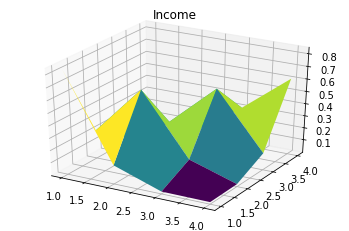

In [232]:
%matplotlib inline
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Income')